In [374]:
%load_ext autoreload
%autoreload 2
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /home/andrea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [375]:
df_raw = load_dataframe()

In [376]:
df_raw.head()

,text,label
0,US trade gap ballooned in October\n\nThe US tr...,business
1,Japanese mogul arrested for fraud\n\nOne of Ja...,business
2,Jarvis sells Tube stake to Spain\n\nShares in ...,business
3,Small firms 'hit by rising costs'\n\nRising fu...,business
4,Oil prices fall back from highs\n\nOil prices ...,business


In [377]:
PREPROCESSING_PIPELINE = [
                        lower,
                        remove_emails,
                        replace_special_characters,
                        replace_br,
                        filter_out_uncommon_symbols,
                        remove_stopwords,
                        strip_text
                    ]

In [378]:
print('Pre-processing text...')
 
print()
print(f'[Debug] Before:\n{df_raw.text.values[0]}')
print()
 
# Replace each sentence with its pre-processed version
df = df_raw.copy()
df['text'] = df_raw['text'].apply(lambda txt: text_prepare(txt, PREPROCESSING_PIPELINE))
 
print(f'[Debug] After:\n{df.text.values[0]}')
print()
 
print("Pre-processing completed!")

Pre-processing text...

[Debug] Before:
US trade gap ballooned in October

The US trade deficit widened by more than expected in October, hitting record levels after higher oil prices raised import costs, figures have shown

The trade shortfall was $55.5bn (£29bn), up 9% from September, the Commerce Department said. That pushed the 10 month deficit to $500.5bn. Imports rose by 3.4%, while exports increased by only 0.6%. A weaker dollar also increased the cost of imports, though this should help drive export demand in coming months. "Things are getting worse, but that's to be expected," said David Wyss of Standard & Poor's in New York. "The first thing is that when the dollar goes down, it increases the price of imports. "We are seeing improved export orders. Things seem to be going in the right direction."

Despite this optimism, significant concerns remain as to how the US will fund its trade and budget deficits should they continue to widen. Another problem highlighted by analysts wa

In [379]:
path = 'vocab/'
if not os.path.exists(path):
    os.makedirs(path)

# Check if vocabulary has already been built
vocab_regex = re.compile(r'idx_to_word\.pkl|word_to_idx\.pkl|word_listing\.pkl')

if len(os.listdir(path)) > 0 and all([vocab_regex.search(f) for f in os.listdir(path)]):
    print('Loading existing vocabulary...')
    idx_to_word, word_to_idx, word_listing = load_vocab()
    print('Vocabulary loaded!')
else:
    print('Building vocabulary...')
    idx_to_word, word_to_idx, word_listing = build_vocabulary(df)
    print('Saving vocabulary...')
    save_vocab(idx_to_word, word_to_idx, word_listing)
    print('Vocabulary built!')

Loading existing vocabulary...
Vocabulary loaded!


In [380]:
evaluate_vocabulary(idx_to_word, word_to_idx, word_listing, df)

[Vocabulary Evaluation] Size checking...
[Vocabulary Evaluation] Content checking...


100%|██████████| 31579/31579 [00:00<00:00, 1062207.19it/s]


[Vocabulary Evaluation] Consistency checking...


100%|██████████| 1000/1000 [00:00<00:00, 14422.14it/s]


[Vocabulary Evaluation] Toy example checking...


100%|██████████| 2/2 [00:00<00:00, 18236.10it/s]


In [381]:
df_train, df_test = split_dataframe(df)

In [382]:
print(f'Train size: {len(df_train)}')
df_train.head()

Train size: 800


,text,label
0,antiterror plan faces first test plans allow h...,politics
1,article elizabeth glaser writes looking email ...,medical
2,wada appeal ruling world antidoping agency wad...,sport
3,looking current sources lists home medical tes...,medical
4,software watching work software monitor every ...,technologie


In [383]:
print(f'Test size: {len(df_test)}')
df_test.head()

Test size: 200


,text,label
0,ukip could sue veritas defectors uk independen...,politics
1,incredibles win animation awards incredibles m...,entertainment
2,almost 30 centuriesfrom unification around 310...,historical
3,anyone know anything chelation therapy using e...,medical
4,kjb mgl uvesa32zip universal vesa driver suppo...,graphics


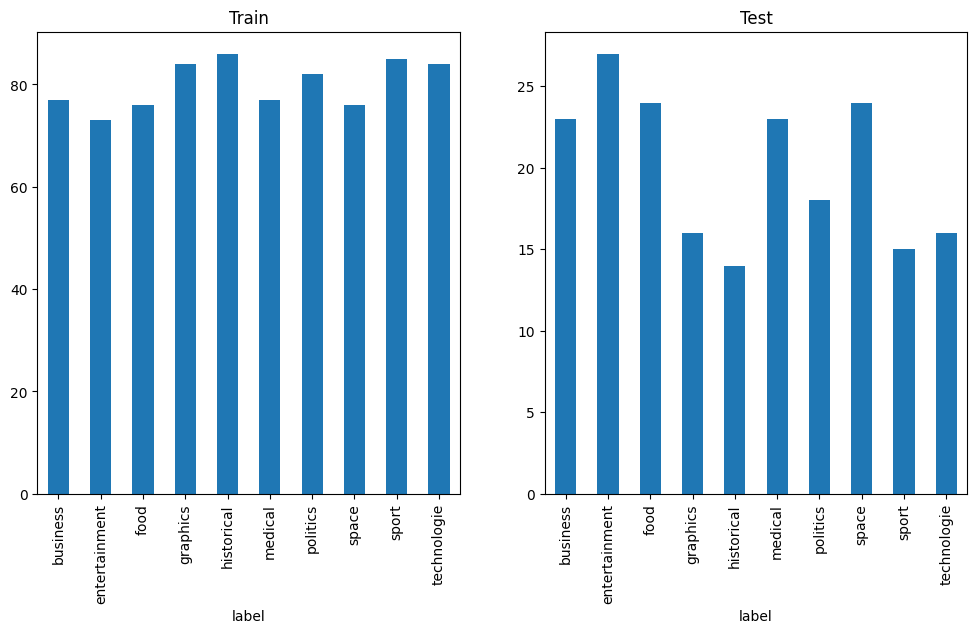

In [384]:
plot_label_distribution([df_train, df_test], labels=['Train', 'Test'])

## PMI

[Debug] Test text:
Hi, my name is Andrea

[Debug] Pre-processed test text:
hi name andrea
[DEBUG] text:  hi name andrea



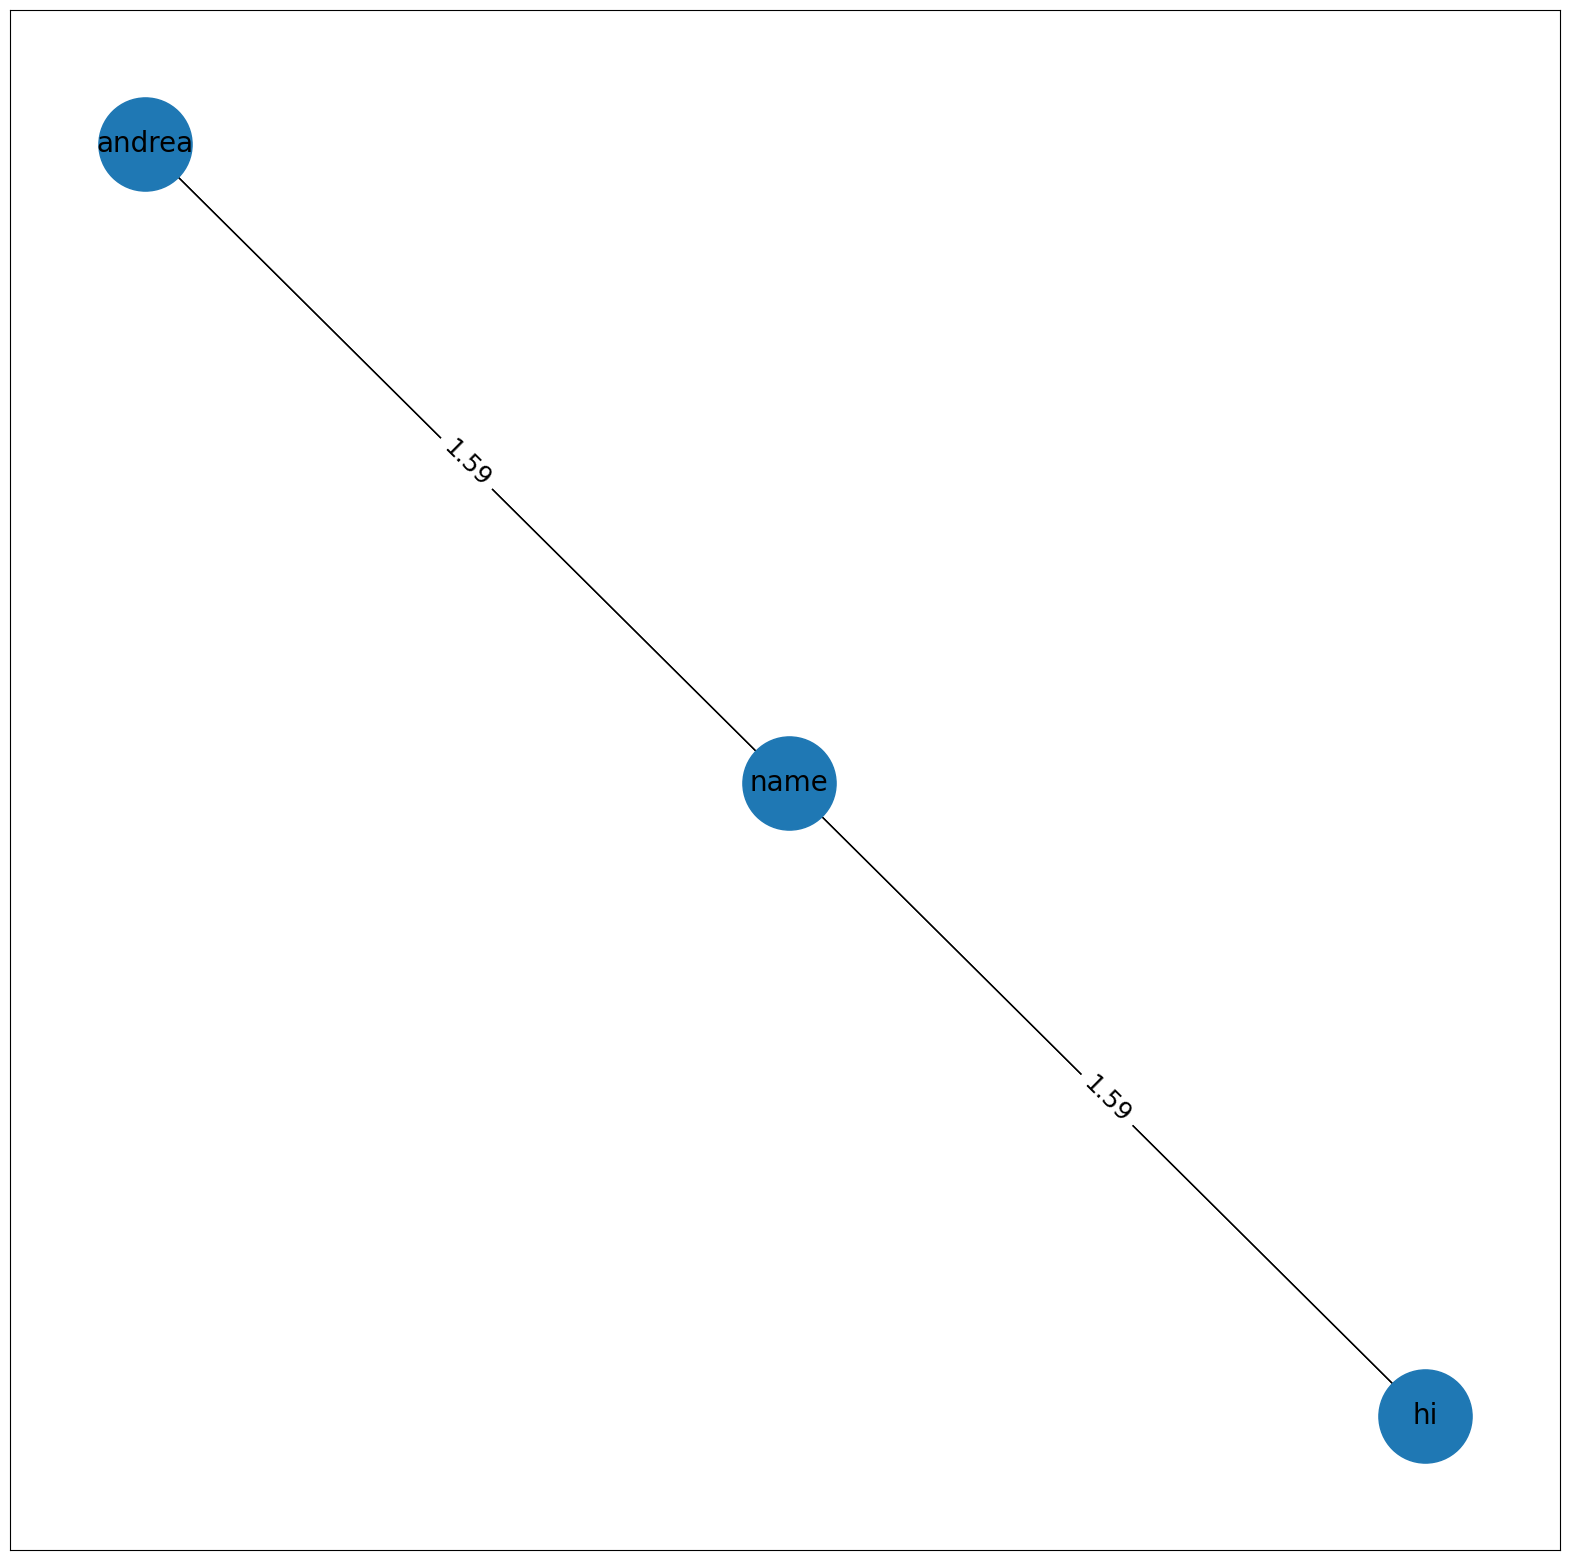

In [386]:
test_text = "Hi, my name is Andrea"
print(f'[Debug] Test text:\n{test_text}')
print()
# TODO: should we remove stopwords here?
processed_text = text_prepare(test_text, PREPROCESSING_PIPELINE)
print(f'[Debug] Pre-processed test text:\n{processed_text}')
pmi, pmi_word_to_idx, pmi_idx_to_word = compute_pmi(processed_text)
print()

# create graph from pmi
G = nx.Graph()
G.add_nodes_from(pmi_word_to_idx.keys())
for word, idx in pmi_word_to_idx.items():
    for word2, idx2 in pmi_word_to_idx.items():
        if word != word2:
            G.add_edge(word, word2, weight=pmi[idx, idx2])

# plot graph with weights
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.5)
nx.draw_networkx(G, pos, node_size=4500, font_size=20, font_family='sans-serif')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=18)
plt.show()
